# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random
from scipy import stats
from pprint import pprint

# Import API Keys
from config import g_key
from config import weather_api_key

# Import Citypy to Determine Citys based on Latitude and longitude
from citipy import citipy


## Generate Cities List

In [6]:
# Create List to hold cities 
cities = []
lat_longs=[]

# Create random list of lat and long combinations
# https://docs.python.org/3/library/random.html
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
# https://www.geeksforgeeks.org/create-pandas-dataframe-from-lists-using-zip/
# https://www.geeksforgeeks.org/python-get-unique-values-list/
# https://github.com/wingchen/citipy
lat = np.random.randint(-90,90,size=1750)
long = np.random.randint(-180,180,size=1750)
lat_longs=zip(lat,long)

for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

717

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# set up API Call information
# https://www.tutorialspoint.com/find-current-weather-of-any-city-using-openweathermap-api-in-python
api_key = weather_api_key
url = "https://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city).json()
print(json.dumps(weather_response, indent=4, sort_keys=True))    

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 63.84,
        "lon": -22.43
    },
    "dt": 1602376993,
    "id": 3416888,
    "main": {
        "feels_like": 29.41,
        "humidity": 87,
        "pressure": 1021,
        "temp": 48.2,
        "temp_max": 48.2,
        "temp_min": 48.2
    },
    "name": "Grindavik",
    "rain": {
        "1h": 1.53
    },
    "sys": {
        "country": "IS",
        "id": 90,
        "sunrise": 1602403686,
        "sunset": 1602440657,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 130,
        "gust": 43.62,
        "speed": 31.09
    }
}


In [8]:
print(requests.get((query_url + city)))

<Response [200]>


In [9]:
# create lists for response information
city_name =[]
country = []
latitude = []
longitude = []
temp = []
humidity = []
cloud = []
windspd = []
date = []


In [10]:
# print log

print('Beginning Data Retrieval ')
print('-----------------------------')

for city in cities:
    try:
        response= requests.get(query_url + city).json()
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windspd.append(response['wind']['speed'])
        date.append(response['dt'])
        record_name = response['name']
        print(f'Processing record {record_name}')
    except:
        print('City not found. Skipping...')
    continue

print('Done checking cities')

Beginning Data Retrieval 
-----------------------------
Processing record Maniwaki
Processing record Guerrero Negro
City not found. Skipping...
Processing record Comodoro Rivadavia
Processing record Egvekinot
City not found. Skipping...
Processing record Hailar
Processing record Barrow
Processing record Iquique
Processing record Khatanga
Processing record Bluff
Processing record Port Lincoln
Processing record San Vicente
Processing record Tawang Town
Processing record Hermanus
Processing record Rypefjord
Processing record Nikolskoye
Processing record Aksu
Processing record Ushuaia
Processing record Tessalit
Processing record Sampit
City not found. Skipping...
Processing record Antofagasta
Processing record Tiksi
Processing record Jamestown
City not found. Skipping...
Processing record Chui
Processing record Saskylakh
Processing record Topeka
Processing record Hobart
Processing record Alofi
Processing record Cape Town
Processing record Horsham
Processing record Atuona
Processing record 

Processing record Chancay
Processing record Mangochi
Processing record Saint Simons
Processing record Roald
Processing record Ghanzi
Processing record High Level
Processing record Blackwater
City not found. Skipping...
Processing record Mufumbwe
Processing record Pacific Grove
City not found. Skipping...
Processing record Vardø
Processing record Madang
Processing record Barcelos
Processing record Colchester
Processing record Wairoa
Processing record Bariloche
Processing record Haapiti
Processing record City of San Pedro
Processing record San Fernando del Valle de Catamarca
Processing record Souillac
City not found. Skipping...
Processing record Khovd
Processing record Bengkulu
Processing record Iqaluit
Processing record Lata
Processing record Faro
Processing record Noumea
Processing record Naryan-Mar
City not found. Skipping...
Processing record Borogontsy
Processing record Pahrump
Processing record Quesnel
Processing record Aquiraz
Processing record Nabire
Processing record Isangel
Pr

Processing record Nayāgarh
Processing record Flinders
Processing record Bahía Blanca
Processing record Paredon
Processing record Canutama
Processing record Tumen
Processing record Donji grad
Processing record Linhai
Processing record Tupik
Processing record Batemans Bay
Processing record Aykino
Processing record Rocha
Processing record Sechura
Processing record Marathon
Processing record Avera
Processing record Macklin
Processing record Plaster Rock
Processing record Khromtau
Processing record Vrangel'
Processing record Bandiagara
Processing record Katherine
Processing record Makakilo City
Processing record Asadābād
Processing record Primo Tapia
Processing record Zambezi
Processing record Soyo
Processing record Kingaroy
Processing record Oodweyne
Processing record Sakakah
Processing record Craig
Processing record Muros
Processing record Buala
Processing record Uruçuí
Processing record Kuvshinovo
Processing record Mahon
Processing record Boyle
Processing record Kendari
Processing record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather={
    "City":city_name,
    "Latitude":latitude,
    "Longitude":longitude,
    "Temperature":temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed":windspd,
    "Country": country,
    "Date":date    
}

city_data = pd.DataFrame(weather)

In [12]:
city_data.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maniwaki,46.38,-75.97,42.48,80,54,9.75,CA,1602376861
1,Guerrero Negro,27.98,-114.06,70.52,80,0,17.47,MX,1602376996
2,Comodoro Rivadavia,-45.87,-67.50,51.80,62,0,3.36,AR,1602376942
3,Egvekinot,66.32,-179.17,31.17,93,69,15.17,RU,1602376996
4,Hailar,49.20,119.70,33.15,89,100,20.29,CN,1602376997


In [13]:
city_data.to_csv("Outputs/city_data.csv", index=False, header =True)

In [14]:
city_data.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,6.620000e+02
mean,21.301420,19.000650,61.931556,73.256798,52.347432,7.969260,1.602377e+09
std,32.530493,90.068041,17.878653,20.701697,40.736378,5.619598,8.583183e+01
min,-54.800000,-179.170000,12.200000,1.000000,0.000000,0.450000,1.602376e+09
25%,-3.792500,-60.502500,48.200000,63.000000,2.000000,3.675000,1.602377e+09
50%,25.725000,23.235000,66.000000,78.000000,60.000000,6.930000,1.602377e+09
75%,48.032500,99.635000,77.030000,88.000000,95.750000,10.895000,1.602377e+09
max,78.220000,179.320000,91.740000,100.000000,100.000000,59.730000,1.602377e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
humid_cities = city_data.loc[city_data['Humidity']>100]
humid_cities

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


###  Skipping - Get the indices of cities that have humidity over 100%.


### Skipping -  Make a new DataFrame equal to the city data to drop all humidity outliers by index.
### Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [18]:
city_data.head(2)


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maniwaki,46.38,-75.97,42.48,80,54,9.75,CA,1602376861
1,Guerrero Negro,27.98,-114.06,70.52,80,0,17.47,MX,1602376996


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [29]:
print(city_data['Latitude'].min())
print(city_data['Latitude'].max())

-54.8
78.22


In [30]:
print(city_data['Temperature'].min())
print(city_data['Temperature'].max())

12.2
91.74


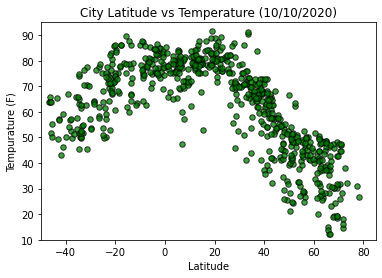

<Figure size 432x288 with 0 Axes>

In [36]:
x_value = city_data['Latitude']
y_value = city_data['Temperature']

plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black",
            s=30, alpha=0.75)
plt.xlim(-50, 85)
plt.ylim(10,95 )
plt.title('City Latitude vs Temperature (10/10/2020)')
plt.xlabel('Latitude')
plt.ylabel('Tempurature (F)')
plt.show()
plt.savefig('Outputs/Lat_vs_Temp.png')

## Latitude vs. Humidity Plot

In [35]:
print(city_data['Humidity'].min())
print(city_data['Humidity'].max())

1
100


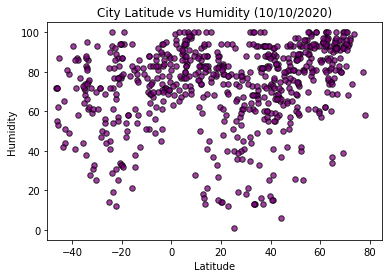

<Figure size 432x288 with 0 Axes>

In [42]:
x_value = city_data['Latitude']
y_value = city_data['Humidity']

plt.scatter(x_value, y_value, marker="o", facecolors="purple", edgecolors="black",
            s=30, alpha=0.75)
plt.xlim(-50, 85)
plt.ylim(-5,105 )
plt.title('City Latitude vs Humidity (10/10/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig('Outputs/Lat_vs_Humidity.png')

## Latitude vs. Cloudiness Plot

In [43]:
print(city_data['Cloudiness'].min())
print(city_data['Cloudiness'].max())

0
100


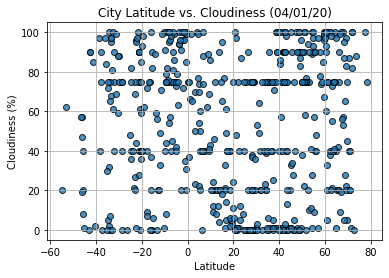

## Latitude vs. Wind Speed Plot

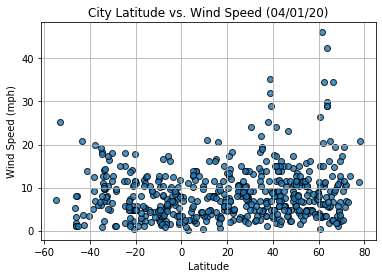

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


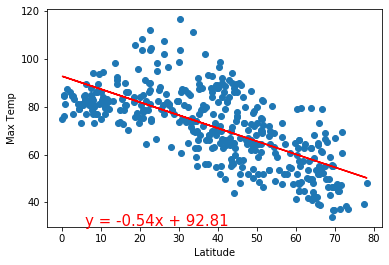

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


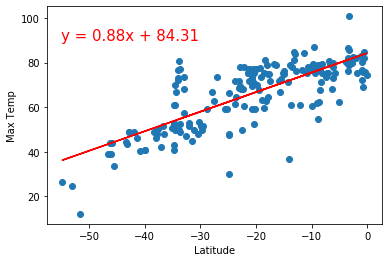

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


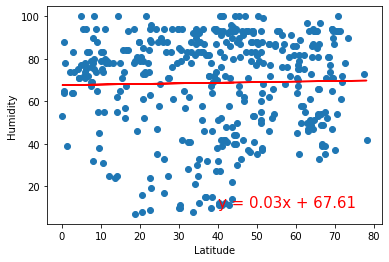

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


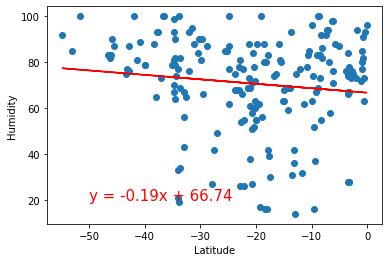

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


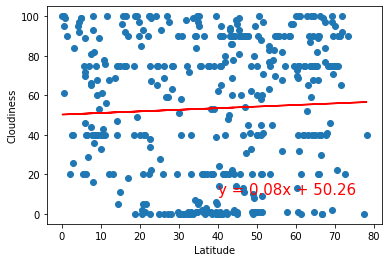

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


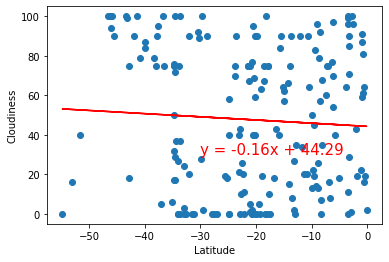

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


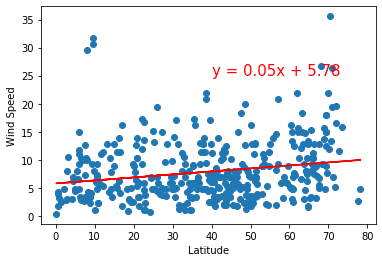

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


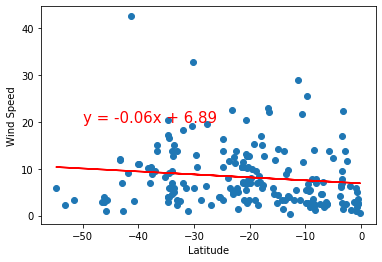